<a href="https://colab.research.google.com/github/HyelinNAM/TIL/blob/master/0220_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


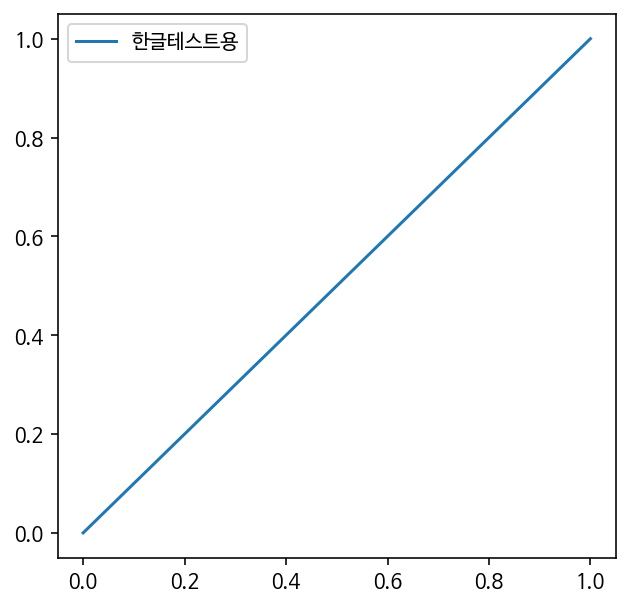

In [0]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [0]:
import pandas as pd
import warnings
import os
warnings.filterwarnings('ignore')

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link ='https://drive.google.com/open?id=1kOaG1ddkyEWHV3iigCFADG1DxmaYnbFB'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile("ratings_train.txt")  
train = pd.read_csv("ratings_train.txt", sep='\t', quoting=3)

In [0]:
link ='https://drive.google.com/open?id=1BbIXNtziKe8T8WEe45AnYlClohNP1-g5'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile("ratings_test.txt")  
test = pd.read_csv("ratings_test.txt", sep='\t', quoting=3)

In [0]:
train.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [0]:
test.head(5)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [0]:
print(train['document'].isnull().sum())

5


In [0]:
train.loc[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [0]:
train = train.dropna(how='any')
# 모든 행에서 NA가 하나라도 있으면 drop

In [0]:
print(train['document'].isnull().sum())

0


In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 2.3MB 48.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
from konlpy.tag import Okt
okt = Okt()

okt.pos
: 품사 태깅 (텍스트를 형태소 단위로 나누고, 나눠진 각 형태소를 그에 해당하는 품사와 함께 리스트화)

<파라미터>
*   norm : 문장 정규화 (표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어줌 ex. US-USA 는 같은 단어로 취급, Automobile, automobile은 같은 단어로 인식)
*   stems : 각 단어에서 어간 추출
*   join : 형태소/품사 형태로 붙여서 리스트화


In [0]:
sample = train.iloc[0,1]

print(okt.pos(sample))
print(okt.pos(sample, norm=True, stem=True))
print(okt.pos(sample, norm=True, stem=True, join=True))

[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나네요', 'Adjective'), ('목소리', 'Noun')]
[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나다', 'Adjective'), ('목소리', 'Noun')]
['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun']


In [0]:
def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [0]:
tokenize(train.iloc[0,1])

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']

In [0]:
# 형태소 분석이 나쁘게 된 예 : / 
tokenize(train.iloc[2,1])

['너/Modifier',
 '무재/Noun',
 '밓었/Noun',
 '다그/Noun',
 '래서/Noun',
 '보다/Verb',
 '추천/Noun',
 '한/Josa',
 '다/Adverb']

'..'과 같은 구두점 제거하는 방법은?
조사를 제거하는 방법은?

<데이터 전처리>
1.   정규표현식
2.   불용어(stop words)

In [0]:
train['document'][:5]

In [0]:
# 1. 정규표현식

train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [0]:
train['document'][:5]

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

In [0]:
# 2. 불용어
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

X_train = []

for sentence in train['document'][0:10000]:
  temp_X = []
  temp_X = okt.morphs(sentence,norm=True ,stem=True)
  temp_X = [word for word in temp_X if not word in stopwords]

  X_train.append(temp_X)

In [0]:
X_train[0:5]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다']]

In [0]:
# 위와같은 문장들의 집합이 Input으로 들어가고 각 문장에는 단어가 형태소화 되어있어야 합니다.
# Word2Vec의 하이퍼파라미터 중 size는 임베딩 사이즈를 말하고 window는 간단하게 설명한 N그램으로 이해해주시면 됩니다.
# min_count 이하의 단어는 없는것 취급합니다.

In [0]:
from gensim.models import Word2Vec

model = Word2Vec(X_train, size=300, window=3, min_count=5, workers=1)

word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [0]:
# 필요없는 메모리 unload
model.init_sims(replace=True)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [0]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(25 ,15))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

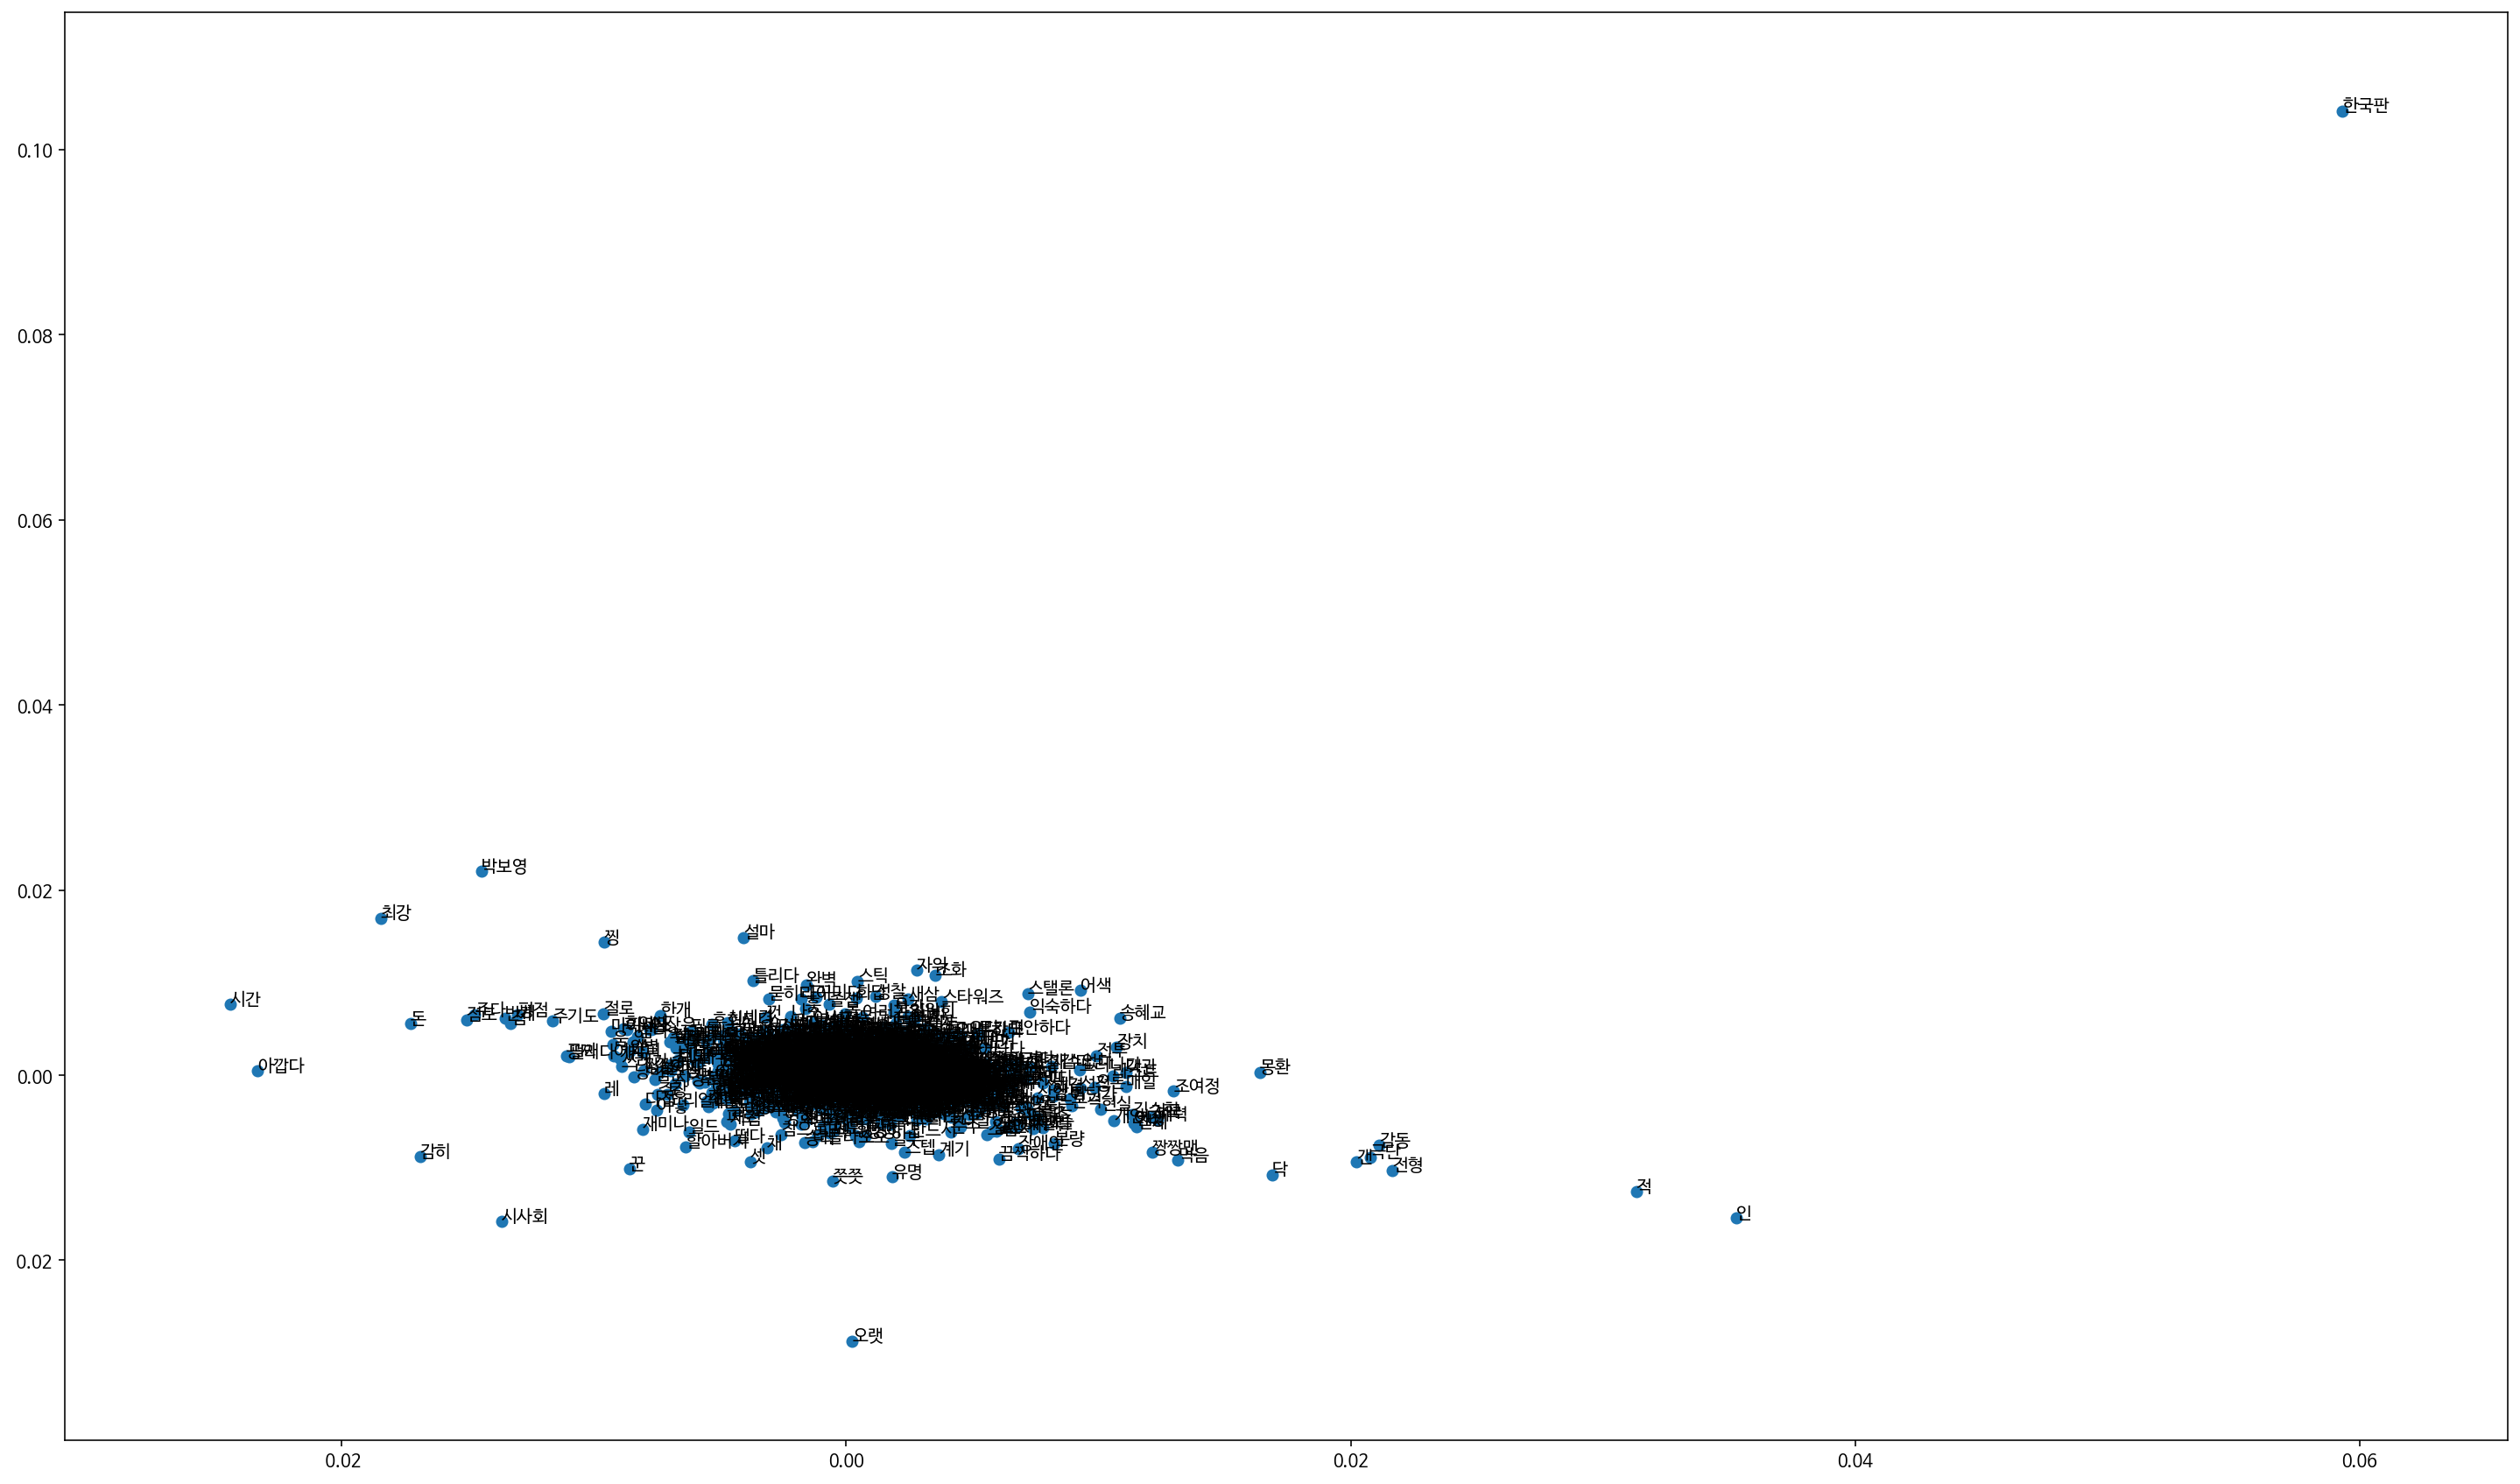

In [0]:
plot_2d_graph(vocabs, xs, ys)

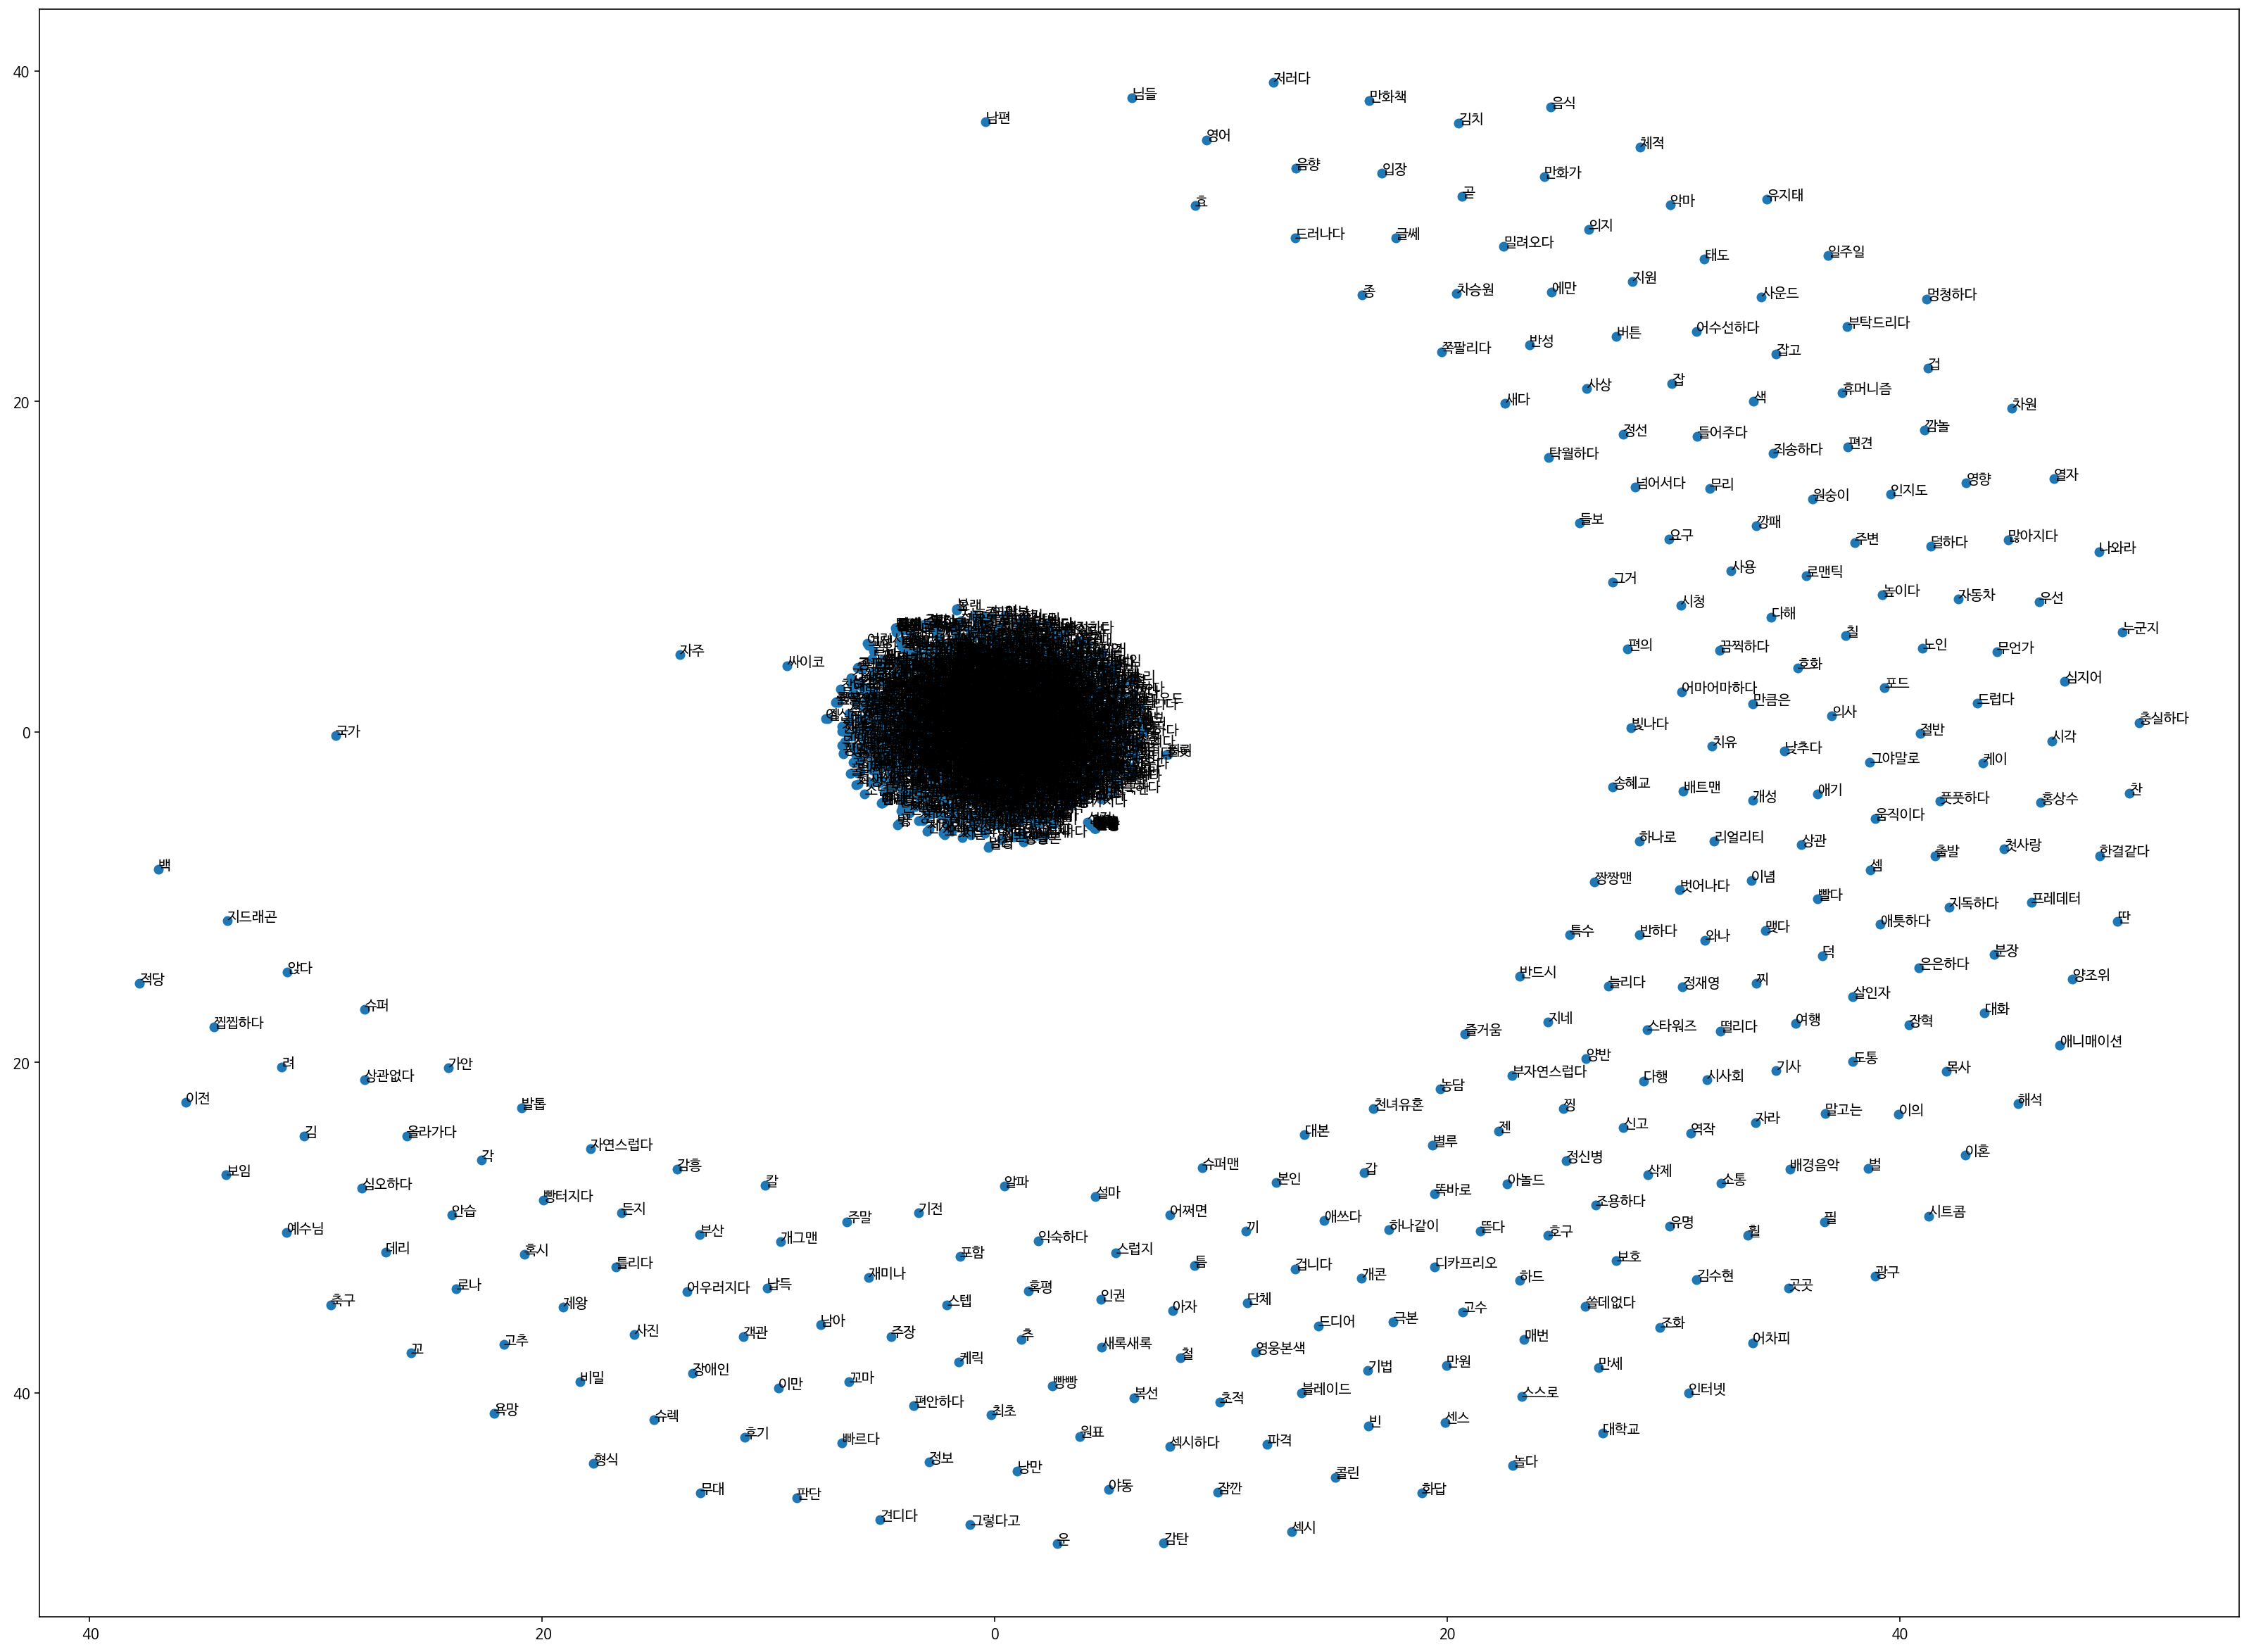

In [0]:
from sklearn.manifold import TSNE

model2 = TSNE(learning_rate=100)
transformed = model2.fit_transform(word_vectors_list)

xs2 = transformed[:,0]
ys2 = transformed[:,1]

plt.figure(figsize=(28,21))

plt.scatter(xs2,ys2)
for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs2[i], ys2[i]))

plt.show()